# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
city_data = []
city = cities[0]
city_url = f"{url}&q={city}"
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': -77.3663, 'lat': 35.6127}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.97, 'feels_like': 24.7, 'temp_min': 24.01, 'temp_max': 25.63, 'pressure': 1020, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1715620769, 'sys': {'type': 1, 'id': 5345, 'country': 'US', 'sunrise': 1715594749, 'sunset': 1715645156}, 'timezone': -14400, 'id': 4469160, 'name': 'Greenville', 'cod': 200}


In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=greenville
Processing Record 1 of Set 1 | greenville
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=alaghsas
Processing Record 2 of Set 1 | alaghsas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=montrose
Processing Record 3 of Set 1 | montrose
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=taoudenni
Processing Record 4 of Set 1 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=bremgarten
Processing Record 5 of Set 1 | bremgarten
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=ilulissat
Processing Record 6 of Set 1 | ilulissat
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=fort bragg
Processing Record 4 of Set 2 | fort bragg
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=kapuskasing
Processing Record 5 of Set 2 | kapuskasing
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=robore
Processing Record 6 of Set 2 | robore
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=umarkot
Processing Record 7 of Set 2 | umarkot
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=tuba city
Processing Record 8 of Set 2 | tuba city
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=paracuru
Processing Record 9 of Set 2 | paracuru
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=same
Processing Record 7 of Set 3 | same
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=uturoa
Processing Record 8 of Set 3 | uturoa
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=rongelap
Processing Record 9 of Set 3 | rongelap
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=port alfred
Processing Record 10 of Set 3 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=ylojarvi
Processing Record 11 of Set 3 | ylojarvi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=nahiyat ash shinafiyah
Processing Record 12 of Set 3 | nahiyat ash shinafiyah
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b4

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=el gouna
Processing Record 11 of Set 4 | el gouna
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=tolanaro
Processing Record 12 of Set 4 | tolanaro
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=la ronge
Processing Record 13 of Set 4 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=yellowknife
Processing Record 14 of Set 4 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=guerrero negro
Processing Record 15 of Set 4 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=saipan
Processing Record 16 of Set 4 | saipan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=badger
Processing Record 15 of Set 5 | badger
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=fuman
Processing Record 16 of Set 5 | fuman
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=kualakapuas
Processing Record 17 of Set 5 | kualakapuas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=port isabel
Processing Record 18 of Set 5 | port isabel
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=bayanhongor
Processing Record 19 of Set 5 | bayanhongor
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=bubaque
Processing Record 20 of Set 5 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a53

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=nukunonu
Processing Record 20 of Set 6 | nukunonu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=north bend
Processing Record 21 of Set 6 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=harstad
Processing Record 22 of Set 6 | harstad
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=borkum
Processing Record 23 of Set 6 | borkum
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=peace river
Processing Record 24 of Set 6 | peace river
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=calvinia
Processing Record 25 of Set 6 | calvinia
http://api.openweathermap.org/data/2.5/weather?units=Metric&AP

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=vilyuchinsk
Processing Record 23 of Set 7 | vilyuchinsk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=ambalangoda
Processing Record 24 of Set 7 | ambalangoda
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=burang
Processing Record 25 of Set 7 | burang
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=didymoteicho
Processing Record 26 of Set 7 | didymoteicho
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=neon karlovasion
Processing Record 27 of Set 7 | neon karlovasion
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=mochudi
Processing Record 28 of Set 7 | mochudi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPI

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=san antonio de pale
Processing Record 28 of Set 8 | san antonio de pale
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=tataouine
Processing Record 29 of Set 8 | tataouine
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=kolonia town
Processing Record 30 of Set 8 | kolonia town
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=ambon
Processing Record 31 of Set 8 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=bechar
Processing Record 32 of Set 8 | bechar
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=altai
Processing Record 33 of Set 8 | altai
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479f

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=dudinka
Processing Record 32 of Set 9 | dudinka
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=ballina
Processing Record 33 of Set 9 | ballina
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=roven'ky
Processing Record 34 of Set 9 | roven'ky
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=suntar
Processing Record 35 of Set 9 | suntar
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=leninsk
Processing Record 36 of Set 9 | leninsk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=soure
Processing Record 37 of Set 9 | soure
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=aykhal
Pr

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=papao
Processing Record 35 of Set 10 | papao
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=portoferraio
Processing Record 36 of Set 10 | portoferraio
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=les anglais
Processing Record 37 of Set 10 | les anglais
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=san matias
Processing Record 38 of Set 10 | san matias
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=miles city
Processing Record 39 of Set 10 | miles city
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=patterson
Processing Record 40 of Set 10 | patterson
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=igarka
Processing Record 39 of Set 11 | igarka
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=ubari
Processing Record 40 of Set 11 | ubari
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=rayside-balfour
Processing Record 41 of Set 11 | rayside-balfour
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=padang
Processing Record 42 of Set 11 | padang
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=al kharijah
Processing Record 43 of Set 11 | al kharijah
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a799c79b479fae8da05a535cdbff3561&q=pandan
Processing Record 44 of Set 11 | pandan
http://api.openweathermap.org/data/2.5/weather?units=Metri

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,greenville,35.6127,-77.3663,25.63,45,0,2.06,US,1715620769
1,alaghsas,17.0187,8.0168,40.94,9,81,2.57,NE,1715620770
2,montrose,38.4166,-108.2673,13.74,33,18,1.93,US,1715620767
3,taoudenni,22.6783,-3.9836,43.25,6,7,4.69,ML,1715620770
4,bremgarten,47.3511,8.3421,23.81,55,72,1.79,CH,1715620771


In [14]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,greenville,35.6127,-77.3663,25.63,45,0,2.06,US,1715620769
1,alaghsas,17.0187,8.0168,40.94,9,81,2.57,NE,1715620770
2,montrose,38.4166,-108.2673,13.74,33,18,1.93,US,1715620767
3,taoudenni,22.6783,-3.9836,43.25,6,7,4.69,ML,1715620770
4,bremgarten,47.3511,8.3421,23.81,55,72,1.79,CH,1715620771


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

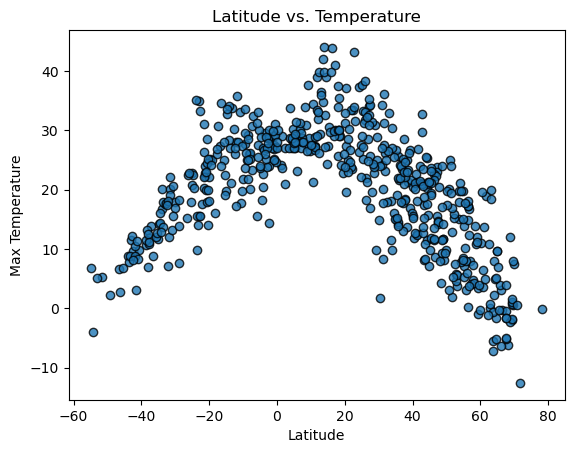

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature') 
plt.ylabel('Max Temperature') 
plt.xlabel('Latitude') 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

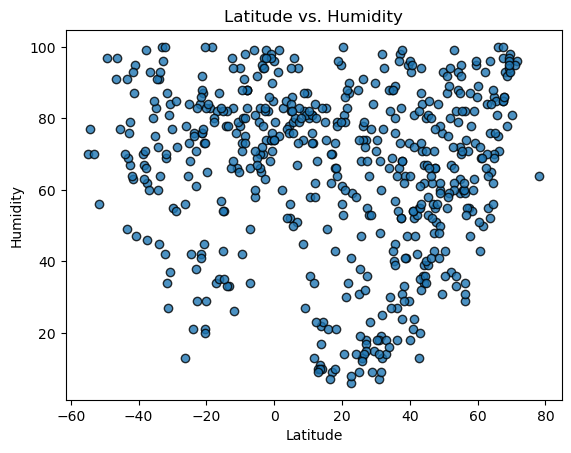

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')  
plt.ylabel('Humidity')  
plt.xlabel('Latitude')  

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

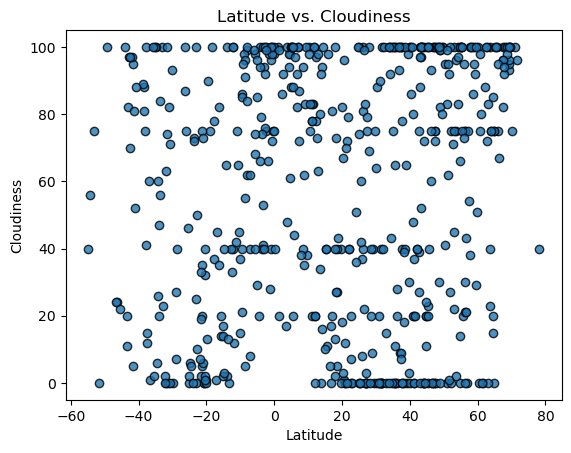

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness')  
plt.xlabel('Latitude')  

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

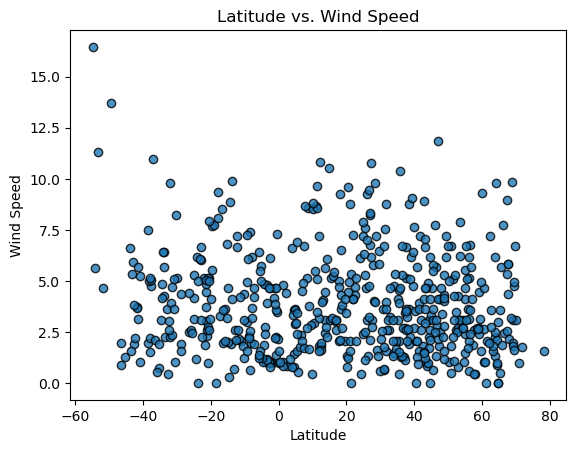

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, annotation_position):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = slope * x_values + intercept
    
    # Create line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    return slope, intercept, regress_values, line_eq

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,greenville,35.6127,-77.3663,25.63,45,0,2.06,US,1715620769
1,alaghsas,17.0187,8.0168,40.94,9,81,2.57,NE,1715620770
2,montrose,38.4166,-108.2673,13.74,33,18,1.93,US,1715620767
3,taoudenni,22.6783,-3.9836,43.25,6,7,4.69,ML,1715620770
4,bremgarten,47.3511,8.3421,23.81,55,72,1.79,CH,1715620771


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,adamstown,-25.0660,-130.1015,20.70,73,0,3.15,PN,1715620772
8,chonchi,-42.6128,-73.8092,9.56,67,70,1.89,CL,1715620772
9,blackmans bay,-43.0167,147.3167,11.52,69,82,5.92,AU,1715620772
10,sao miguel do araguaia,-13.2750,-50.1628,33.79,33,0,0.70,BR,1715620772
11,port mathurin,-19.6833,63.4167,25.11,65,13,7.68,MU,1715620772


###  Temperature vs. Latitude Linear Regression Plot

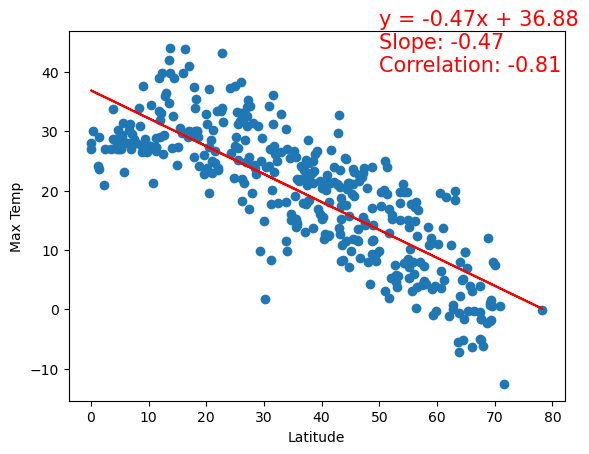

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Max Temp vs. Latitude', 'Max Temp', (50, 40))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation1:.2f}',
             (50, 40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

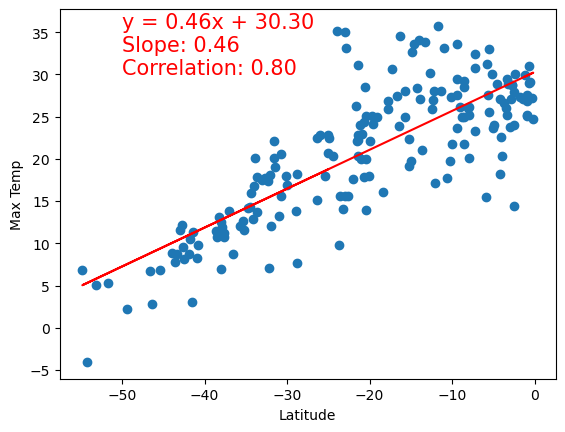

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Max Temp vs. Latitude', 'Max Temp', (-50, 30))

# scatter plot
correlation = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (-50, 30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

### **Discussion about the linear relationship:** 
Both the Northern and Southern Hemisphere showed strong correlations between Latitude and Max Temperature. We can observe this with the correlation score. Both have a correlation score of 0.79, which is a strong correlation. 0.8 is considered to be a "very strong" correlation, and we see a correlation just 0.01 below that with both graphs above. This suggests that your location on the globe will largely determine the maximum temperatures in that area.

### Humidity vs. Latitude Linear Regression Plot 

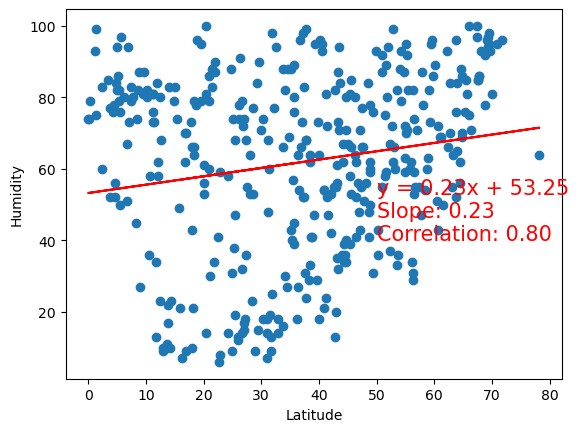

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Humidity vs. Latitude', 'Humidity', (50, 40))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (50, 40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

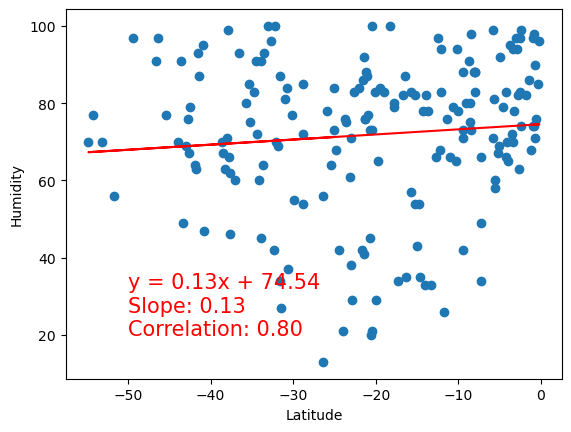

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Humidity vs. Latitude', 'Humidity', (-50, 20))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (-50, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** The relationship between Humidity and Latitude was very interesting for both the Northern and Southern hemispheres. Despite both graphs displaying what LOOKS to be non-correlated data, the correlation score for both the Northern and Southern hemispheres showed very strong correlations (0.8 exactly). This is precisely why it is important to include those stats on the graph, so we are not left guessing whether there is truly a correlation or not. This suggests that your location on the globe will largely determine the humidity in that area.

### Cloudiness vs. Latitude Linear Regression Plot

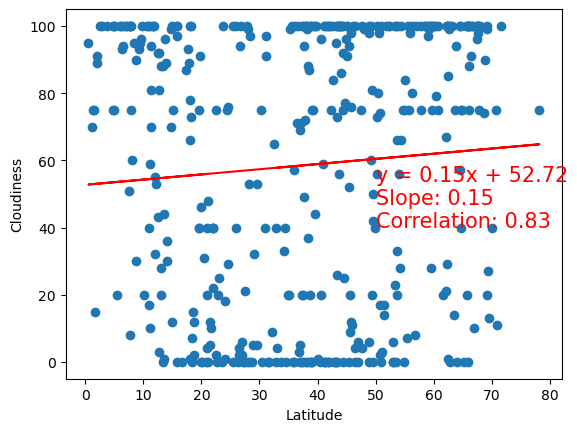

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Cloudiness vs. Latitude', 'Cloudiness', (50, 40))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (50, 40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

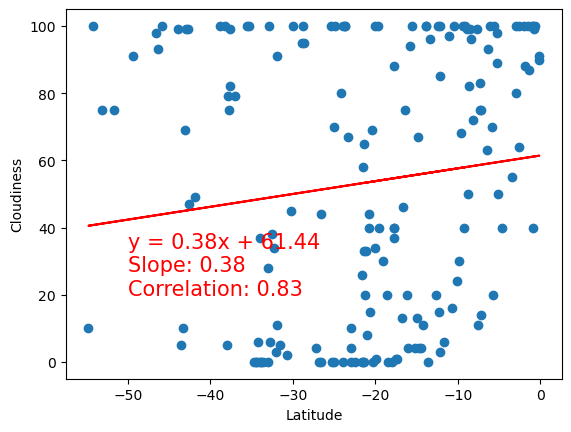

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Cloudiness vs. Latitude', 'Cloudiness', (-50, 20))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (-50, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Similar to Latitude and Humidity, the relationship between Latitude and Cloudiness shows a very strong correlation (0.83) despite the graph APPEARING to be more random. This suggests that your location on the globe will largely determine the cloudiness in that area.

### Wind Speed vs. Latitude Linear Regression Plot

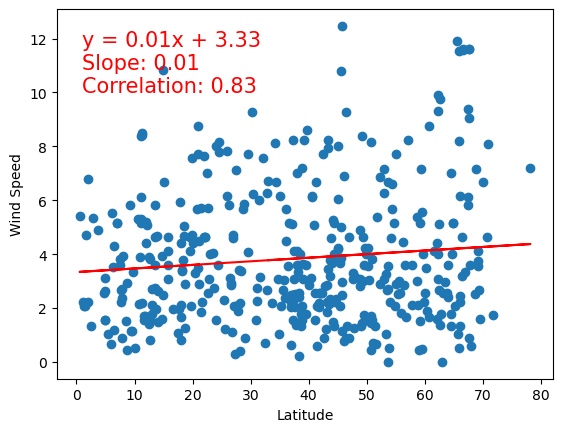

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Wind Speed vs. Latitude', 'Wind Speed', (1, 10))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (1, 10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

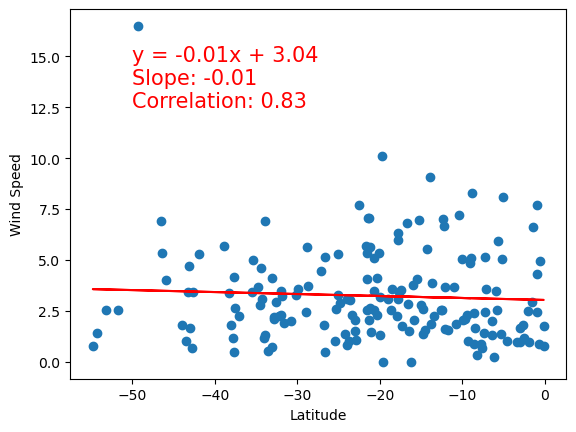

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Wind Speed vs. Latitude', 'Wind Speed', (-50, 12.5))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (-50, 12.5), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** Finally, we AGAIN see very strong correlation in our visualizations. These two graphs, representing the relationship between Wind Speed and Latitude, show a very strong correlation (0.83). This suggests that your location on the globe will largely determine the speed of wind in that area.